In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from numpy.linalg import eig

In [4]:
data=np.array([[3,4],[2,8],[6,9],[10,12]])
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [9]:
df=pd.DataFrame(data,columns=["ML","DL"])
df

,ML,DL
0,3,4
1,2,8
2,6,9
3,10,12


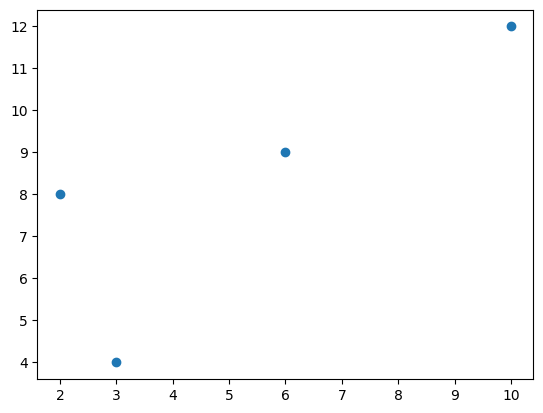

In [10]:
plt.scatter(df["ML"],df["DL"])

In [12]:
#PCA - Steps
#1) Standardizatoon
#2) COV- Matrix
#3) Eigen-vector and eigen value
#4) Principal Component

In [13]:
df

,ML,DL
0,3,4
1,2,8
2,6,9
3,10,12


In [14]:
df.T

,0,1,2,3
ML,3,2,6,10
DL,4,8,9,12


In [16]:
meanbycol=np.mean(df,axis=0)
meanbycol

ML    5.25
DL    8.25
dtype: float64

In [17]:
scaled_data=df-meanbycol
scaled_data

,ML,DL
0,-2.25,-4.25
1,-3.25,-0.25
2,0.75,0.75
3,4.75,3.75


In [18]:
#Step-2

In [24]:
cov_mat=np.cov(scaled_data.T)
cov_mat

array([[12.91666667,  9.58333333],
       [ 9.58333333, 10.91666667]])

In [22]:
#Step-3 : Eigen value and eign Vector

In [29]:
eig_val,eig_vec=np.linalg.eig(cov_mat)

In [30]:
eig_val

array([21.55203266,  2.28130068])

In [31]:
eig_vec

array([[ 0.74289445, -0.66940857],
       [ 0.66940857,  0.74289445]])

In [34]:
#2*2

In [35]:
scaled_data

,ML,DL
0,-2.25,-4.25
1,-3.25,-0.25
2,0.75,0.75
3,4.75,3.75


In [36]:
eig_vec.T.dot(scaled_data.T).T

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

In [37]:
from sklearn.decomposition import PCA
pca=PCA()
pca

PCA()

In [38]:
pca.fit_transform(scaled_data)

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

In [39]:
pd.DataFrame(data=pca.fit_transform(scaled_data),columns=["PC1","PC2"])

,PC1,PC2
0,-4.516499,-1.651132
1,-2.581759,1.989854
2,1.059227,0.055114
3,6.039031,-0.393837


In [41]:
pca.inverse_transform(pca.fit_transform(scaled_data))

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [42]:
pca.explained_variance_ratio_

array([0.90428109, 0.09571891])

In [43]:
0.90428109+0.09571891

1.0

In [45]:
new_data=pd.read_csv("glass.csv")
new_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [48]:
new_df=new_data.drop(labels=['Type'],axis=1)
new_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [50]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


In [52]:
#PCA
#Step-1 Standardization of the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [56]:
scale_data=scaler.fit_transform(new_df)
scale_df=pd.DataFrame(data=scale_data,columns=new_df.columns)
scale_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [58]:
scale_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,-2.877034e-14,1.002345,-2.381516,-0.608273,-0.226229,0.261433,5.137232
Na,214.0,2.191393e-15,1.002345,-3.286943,-0.614158,-0.132382,0.512033,4.875637
Mg,214.0,-1.328117e-16,1.002345,-1.865511,-0.395774,0.552779,0.636168,1.254639
Al,214.0,-2.988264e-16,1.002345,-2.318616,-0.511756,-0.170460,0.371598,4.125851
Si,214.0,9.525091e-16,1.002345,-3.676472,-0.480029,0.179965,0.564962,3.570524
K,214.0,3.527811e-17,1.002345,-0.763919,-0.575650,0.089053,0.173582,8.780145
Ca,214.0,-3.154278e-16,1.002345,-2.484084,-0.504966,-0.251413,0.151806,5.094318
Ba,214.0,-6.640586e-17,1.002345,-0.352877,-0.352877,-0.352877,-0.352877,5.997210
Fe,214.0,-3.735330e-17,1.002345,-0.586451,-0.586451,-0.586451,0.442242,4.659881


In [60]:
from sklearn.decomposition import PCA
pca=PCA()
pca

PCA()

In [63]:
scale_df.shape

(214, 9)

#### Eigen value and Eigen Vector is calculated internally in PCA library

In [67]:
pc_df=pd.DataFrame(pca.fit_transform(scale_df))
pc_df.head()

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315


In [68]:
pc_df.shape

(214, 9)

In [70]:
var=pca.explained_variance_ratio_
var

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [71]:
type(var)

numpy.ndarray

In [73]:
max(var)

0.2790181917945646

In [74]:
max(var)*100

27.90181917945646

In [75]:
min(var)*100

0.01787575359017245

In [76]:
sum(var)*100

99.99999999999999

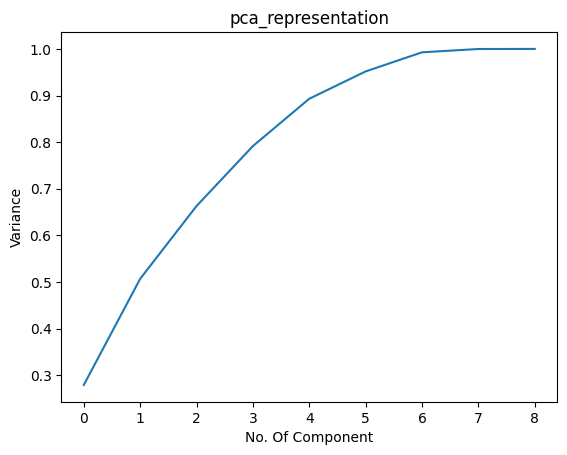

In [77]:
plt.figure()
plt.plot(np.cumsum(var))
plt.xlabel("No. Of Component")
plt.ylabel("Variance")
plt.title("pca_representation")
plt.show()

In [78]:
new_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [79]:
pc_df.head()

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315


In [ ]:
PCA(n_components=6)